***IMPORTING LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
water=pd.read_csv('/content/drive/MyDrive/self/water_potability.csv')
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


***PREPROCESSING***

In [ ]:
# checking missing values and handling if any
water.isnull().sum()
water.dropna(inplace=True)

In [ ]:
water['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

In [ ]:
water.shape

(2011, 10)

In [ ]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


<Axes: >

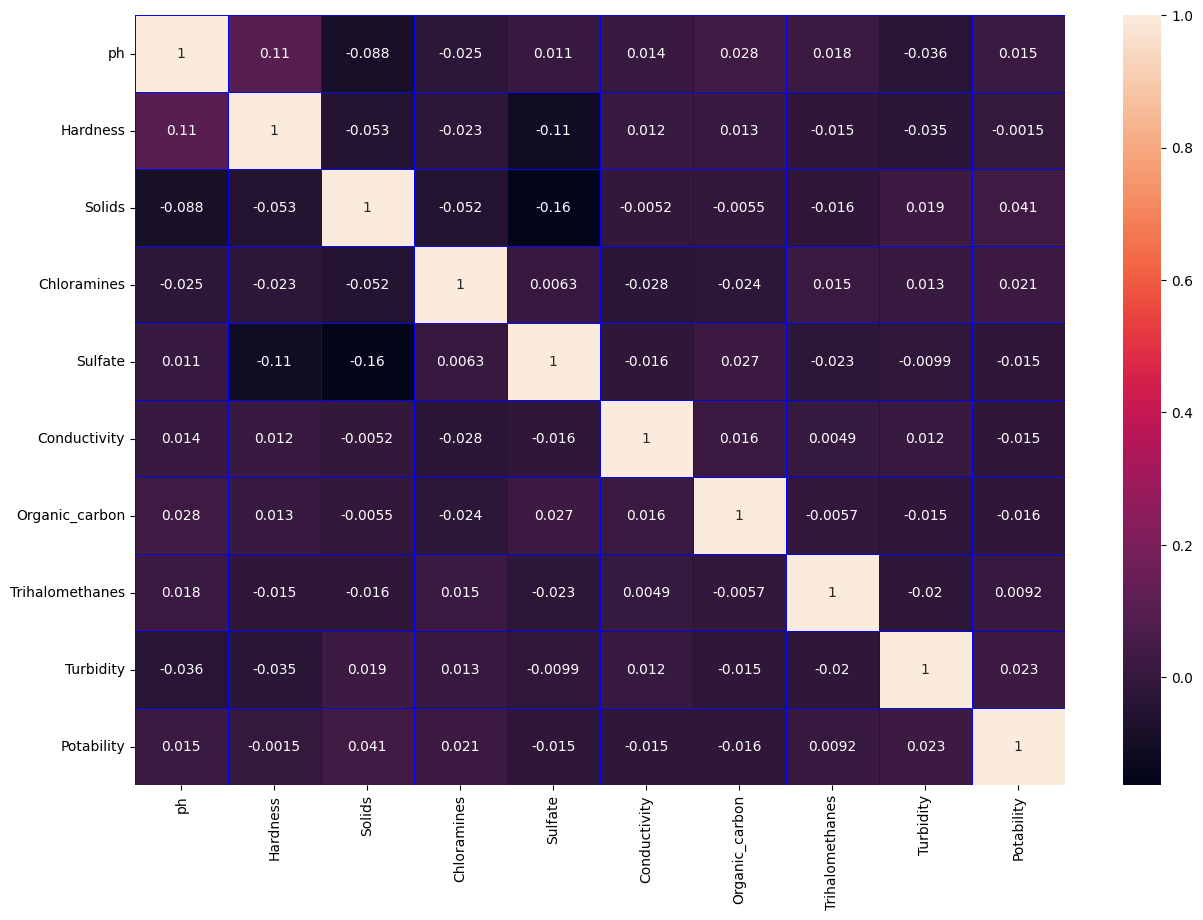

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(water.corr(),linewidths=0.7,linecolor='blue',annot=True)

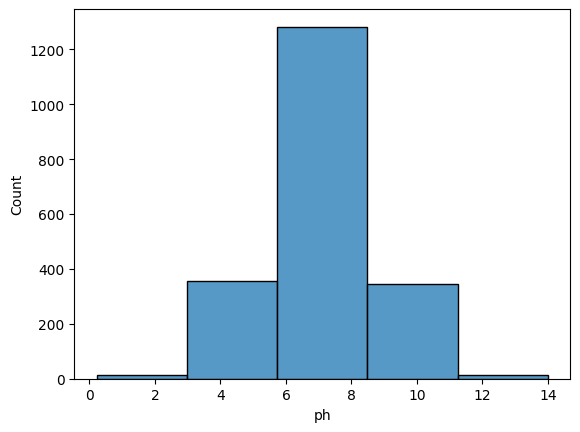

In [ ]:
sns.histplot(water['ph'],bins=5)
plt.show()

In [ ]:
# sns.pairplot(water)
# plt.show()

In [ ]:
# Splitting data into x and y
x=water.drop(columns='Potability')
y=water['Potability']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
#splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=0)

#scaling
ss=StandardScaler()
ss.fit(x_train)
x_train_scaled=ss.transform(x_train)
x_test_scaled=ss.transform(x_test)


In [ ]:
knn=KNeighborsClassifier()
svm=SVC()
nbg=GaussianNB()
dec_tree=DecisionTreeClassifier()
random_forest=RandomForestClassifier()
gr_boost=GradientBoostingClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()
models=[knn,svm,nbg,dec_tree,random_forest,gr_boost,xgb,ada]
evaluation={'name':[],'accuracy':[]}


for model in models:
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  evaluation['name'].append(model)
  evaluation['accuracy'].append(accuracy)
  print(model,'\n')
  print(f"Accurcy score of {model} is :",accuracy_score(y_test,y_pred))
  print('--------------/////////////\\\\\\\\\\\\\\\\\------------------','\n')
  print(classification_report(y_test,y_pred))
  print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!','\n')

best_model_name = evaluation['name'][np.argmax(evaluation['accuracy'])]
best_model_accuracy = evaluation['accuracy'][np.argmax(evaluation['accuracy'])]
print('\n')
print(f"Model with highest accuracy: {best_model_name} with an accuracy score of {best_model_accuracy} ")

KNeighborsClassifier() 

Accurcy score of KNeighborsClassifier() is : 0.6316666666666667
--------------/////////////\\\\\\\\\------------------ 

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       293
           1       0.64      0.65      0.64       307

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

SVC() 

Accurcy score of SVC() is : 0.675
--------------/////////////\\\\\\\\\------------------ 

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       293
           1       0.69      0.66      0.67       307

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.67       600
weighted avg       0.68      0.68      0.67       600

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# Hyper paramater tuning

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 50, None],
}

rs_rf = RandomizedSearchCV(random_forest, param_grid, cv=5, n_iter=5, random_state=0)
rs_rf.fit(x_train_scaled, y_train)

print("Best parameters:", rs_rf.best_params_)
print("Best score:", rs_rf.best_score_)


Best parameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 20}
Best score: 0.6988888888888889


**CONCLUSION**

RandomForest has been finalized as the best model with an accuracy of 0.706